In [25]:
import cudf
from cuml.manifold.umap import UMAP

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(25, 12.5)})

import numpy as np
import pandas as pd

In [29]:
mappings_path = "./notebooks/host/final_model_dglke/entities.tsv"
ent_mapping = pd.read_csv(
    mappings_path,    
    sep="\t",
    index_col=0,
    header=None,
    names=["value"],
)

ent_mapping = ent_mapping.fillna("")

def map_label(l):
    if '/objects/' in l:
        return 'object'
    elif '/people/' in l:
        return 'people/orgs'
    elif 'wikidata' in l:
        return 'wikidata'
    elif 'blog.sciencemuseum' in l:
        return 'blog'
    elif 'journal.sciencemuseum' in l:
        return 'journal'
    else:
        return 'literal'
    
ent_mapping['group'] = ent_mapping['value'].apply(map_label)

In [4]:
%%time
embeddings_path = "./notebooks/host/final_model_dglke/heritageconnector_RotatE_entity.npy"
ent_embeddings = np.load(embeddings_path).astype('float32')
ent_embeddings.shape

CPU times: user 349 ms, sys: 1.54 s, total: 1.89 s
Wall time: 1.89 s


(645565, 800)

In [58]:
%%time
projection = UMAP(    
    n_neighbors=25,
    negative_sample_rate=20
).fit_transform(ent_embeddings)

projection.shape

CPU times: user 32.4 s, sys: 20 s, total: 52.4 s
Wall time: 52.3 s


(645565, 2)

/opt/conda/envs/rapids/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


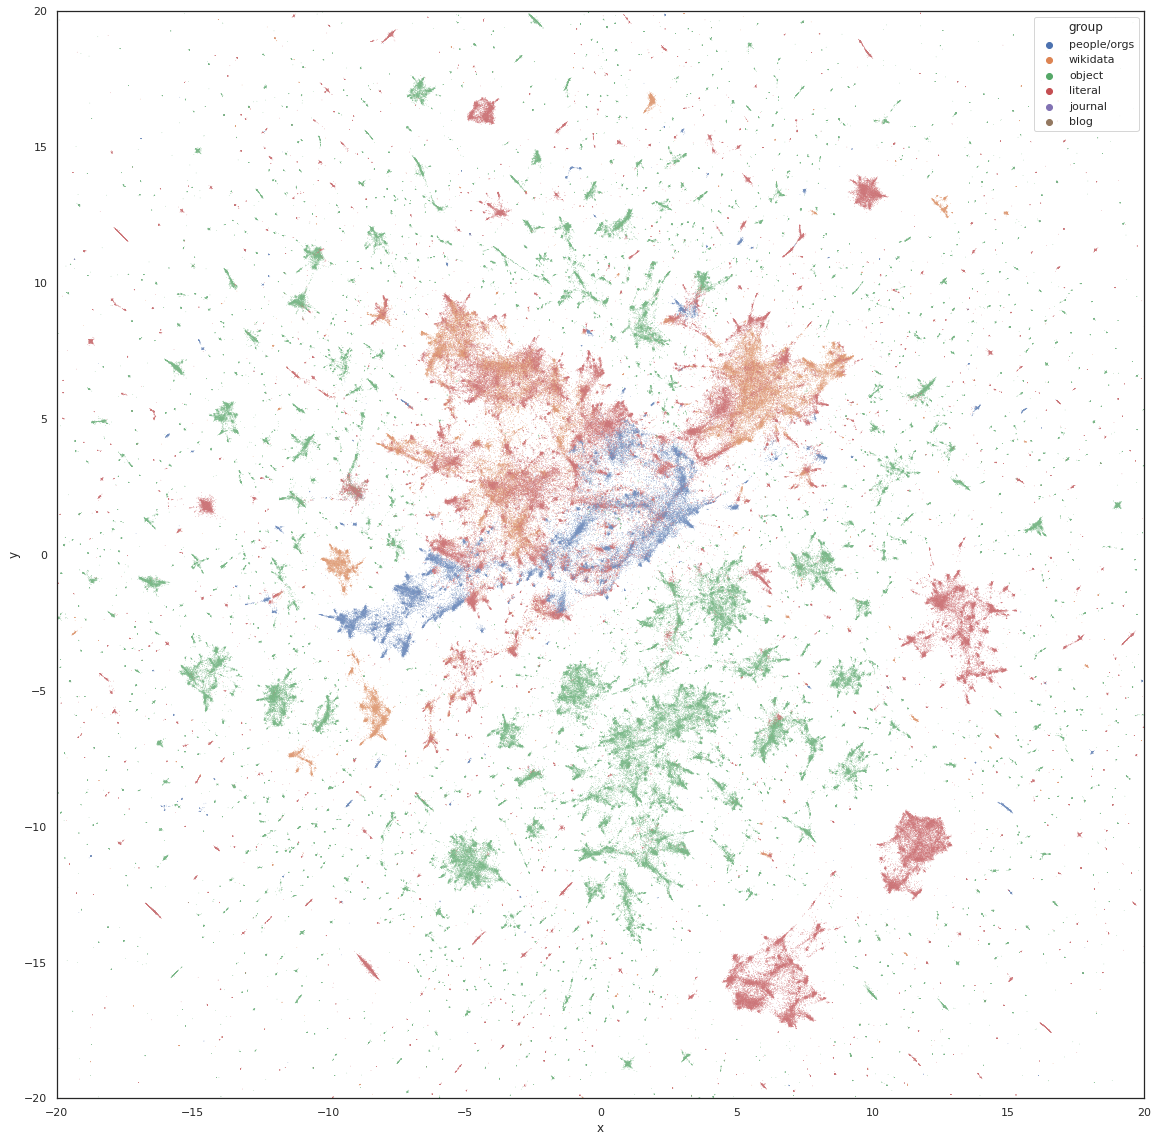

In [59]:
def plot(projection: np.ndarray):
    projection_df = pd.DataFrame(projection, columns=("x", "y"))
    projection_df["group"] = ent_mapping["group"]
    projection_df

    idxs = projection_df[projection_df["group"].isin(["blog", "journal", "wikidata"])].index.tolist()
    idxs = projection_df.index.tolist()

    fig, ax = plt.subplots(figsize=(25,20))
    sns.scatterplot(x=projection_df.loc[idxs, "x"], y=projection_df.loc[idxs, "y"], hue=projection_df["group"], s=0.3)
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
    plt.gca().set_aspect('equal', adjustable='box')
    
    
plot(projection)